In [38]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'## imcsv filepoort of 
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'medical.csv')
import pandas as pd
import numpy as np
import jovian
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
medical_df=pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='age & charges'
)
fig.show()

In [41]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [42]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [43]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [44]:




non_smoker_df= medical_df[medical_df.smoker=='no']
non_smoker_df['sex']=non_smoker_df['sex'].map({'male':1, 'female':0})
non_smoker_df['smoker'] = non_smoker_df['smoker'].map({'yes': 1, 'no': 0})

non_smoker_df = non_smoker_df.drop(columns=['region'])
non_smoker_df



C:\Users\BIT\AppData\Local\Temp\ipykernel_7704\3245255941.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BIT\AppData\Local\Temp\ipykernel_7704\3245255941.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,charges
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
...,...,...,...,...,...,...
1332,52,0,44.700,3,0,11411.68500
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350


In [45]:
x=non_smoker_df.iloc[:,:-1].values
y=non_smoker_df.iloc[:,-1].values


In [46]:
numeric_col=non_smoker_df.select_dtypes(include=np.number).columns.tolist()
catagorical_col=non_smoker_df.select_dtypes('object').columns.tolist()

<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

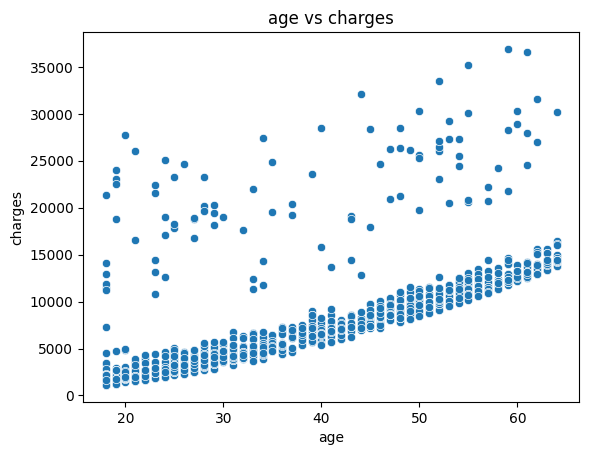

In [47]:

plt.title('age vs charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges')

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
non_smoker_df

,age,sex,bmi,children,smoker,charges
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
...,...,...,...,...,...,...
1332,52,0,44.700,3,0,11411.68500
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
from sklearn.metrics import mean_absolute_error, r2_score

In [62]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic

# Define the kernel: RBF with automatic length scale
kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1) + WhiteKernel()


gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=15)
# Fit to training data
gp.fit(x_train_scaled, y_train)
# Predict on test data
y_pred, y_std = gp.predict(x_test_scaled, return_std=True)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2603.69
R² Score: 0.41


c:\Users\BIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.

c:\Users\BIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.



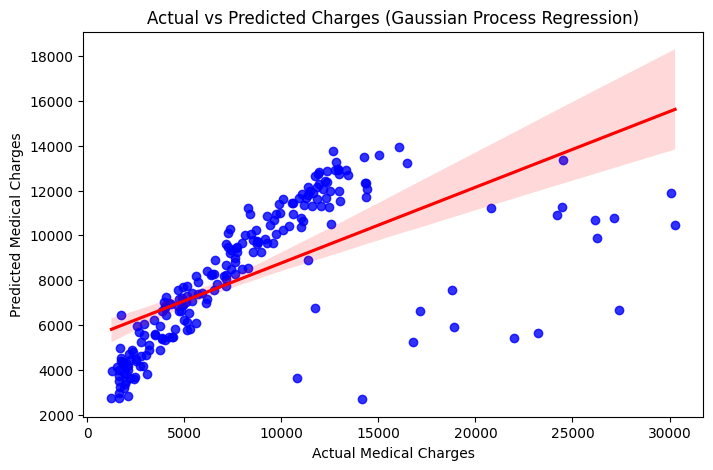

In [65]:
# Scatter Plot for Actual vs Predicted
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Medical Charges")
plt.ylabel("Predicted Medical Charges")
plt.title("Actual vs Predicted Charges (Gaussian Process Regression)")
plt.show()

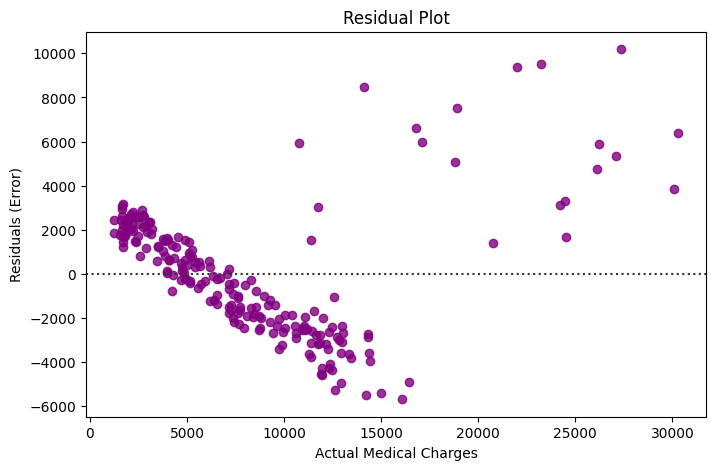

In [57]:
# Residual Plot
plt.figure(figsize=(8,5))
sns.residplot(x=y_test, y=y_test - y_pred, color="purple")
plt.xlabel("Actual Medical Charges")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

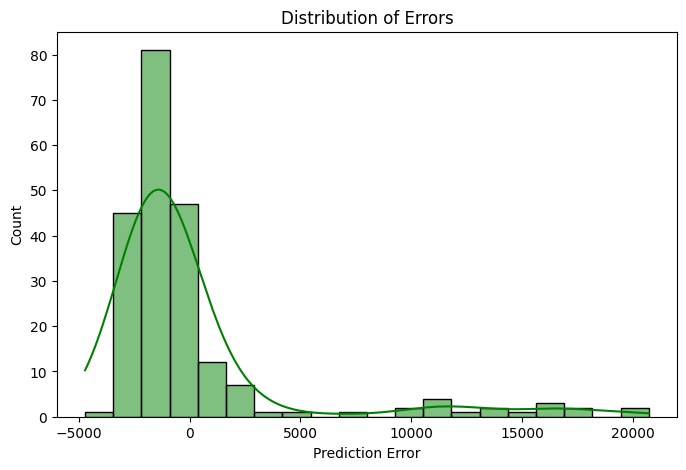

In [64]:
# Error Distribution Histogram
plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, bins=20, kde=True, color="green")
plt.xlabel("Prediction Error")
plt.title("Distribution of Errors")
plt.show()

In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid_xgb = {
    "n_estimators": [100, 300, 500, 700],  # More trees, better learning
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Lower values prevent overfitting
    "max_depth": [3, 5, 7, 9],  # Controls model complexity
    "subsample": [0.6, 0.8, 1.0],  # Use a subset of data
    "colsample_bytree": [0.6, 0.8, 1.0]  # Use a subset of features per tree
}

# Initialize model
xgb = XGBRegressor()

# Use RandomizedSearchCV (faster than GridSearchCV)
random_search_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring="r2", n_iter=20, n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(x_train, y_train)

# Best parameters
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

# Train XGBoost with best parameters
best_xgb = random_search_xgb.best_estimator_
y_xgb_pred = best_xgb.predict(x_test)

# Evaluate performance
r2_xgb = r2_score(y_test, y_xgb_pred)
mae_xgb = mean_absolute_error(y_test, y_xgb_pred)

print(f"Optimized XGBoost R² Score: {r2_xgb:.2f}")
print(f"Optimized XGBoost MAE: {mae_xgb:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Optimized XGBoost R² Score: 0.41
Optimized XGBoost MAE: 2444.89


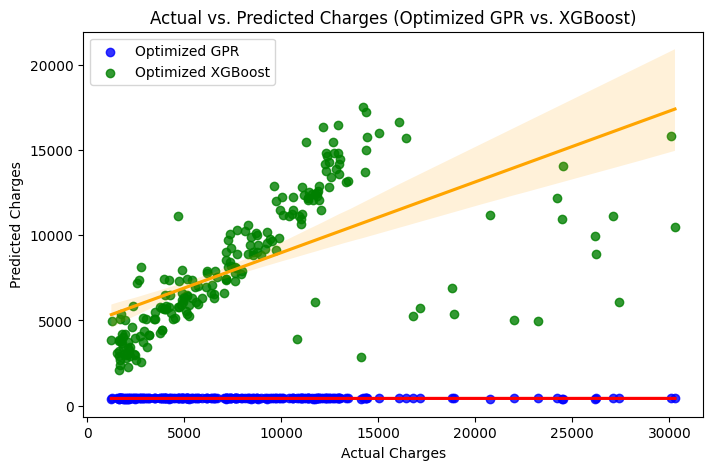

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare GPR and XGBoost Predictions
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_std, label="Optimized GPR", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(x=y_test, y=y_xgb_pred, label="Optimized XGBoost", scatter_kws={"color": "green"}, line_kws={"color": "orange"})
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Optimized GPR vs. XGBoost)")
plt.legend()
plt.show()